<a href="https://colab.research.google.com/github/nandiniparekh/Fuzzy-Logic/blob/main/Fuzzy_Tree_For_Tipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy Tree For Tipping

## Imports

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Define Input Attributes

The tip is calculated based on the quality of the food and the service.

The quality of the food is dependent on the following attributes


1.   Temperature
2.   Flavor
3.   Portion Size

The quality of the service is dependent on the following attributes

1. Attentiveness
2. Friendliness
3. Speed of Service

All these input attributes, along with their respective outputs are defined here.



In [ ]:
temperature = ctrl.Antecedent(np.linspace(0, 10, 11),'temperature')
flavor = ctrl.Antecedent(np.linspace(0, 10, 11),'flavor')
portion_size = ctrl.Antecedent(np.linspace(0, 10, 11),'portion_size')
food_quality = ctrl.Consequent(np.linspace(0, 10, 11),'food_quality')

attentiveness = ctrl.Antecedent(np.linspace(0, 10, 11),'attentiveness')
friendliness = ctrl.Antecedent(np.linspace(0, 10, 11),'friendliness')
speed_of_service = ctrl.Antecedent(np.linspace(0, 10, 11),'speed_of_service')
service = ctrl.Consequent(np.linspace(0, 10, 11),'service')

tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
food_sim_input = ctrl.Antecedent(np.linspace(0, 10, 11),'food_sim_input')
service_sim_input = ctrl.Antecedent(np.linspace(0, 10, 11),'service_sim_input')

The corresponding membership functions are defined here.

In [ ]:
temperature.automf(3)
flavor.automf(3)
portion_size.automf(3)
food_quality.automf(3)

attentiveness.automf(3)
friendliness.automf(3)
speed_of_service.automf(3)
service.automf(3)

tip.automf(3)
food_sim_input.automf(3)
service_sim_input.automf(3)

An example of a membership function defined above is graphed here.

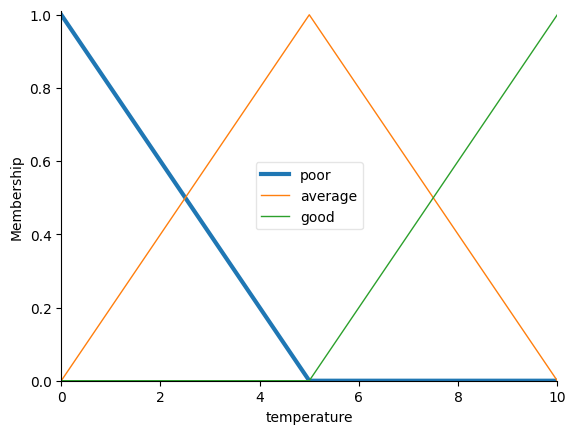

In [ ]:
# Shows the values of temperature and how likely they are to be poor.
temperature['poor'].view()

## Define Rules

The rules to define the output attributes are defined below.
Food Quality and Service have similar definitions.

In [ ]:
def food_quality_rules(temperature, flavor, portion_size, food_quality):
  # if either of the attribute is poor, then food quality is poor
  rule1_food = ctrl.Rule(temperature['poor'] | flavor['poor'] | portion_size['poor'], food_quality['poor'])

  # if either is average, then food quality is average
  rule2_food = ctrl.Rule(temperature['average'] & flavor['average'], food_quality['average'])
  rule3_food = ctrl.Rule(flavor['average'] & portion_size['average'], food_quality['average'])
  rule4_food = ctrl.Rule(temperature['average'] & portion_size['average'], food_quality['average'])

  # if either is good, then food quality is good
  rule5_food = ctrl.Rule(temperature['good'] & portion_size['good'], food_quality['good'])
  rule6_food = ctrl.Rule(flavor['good'] & portion_size['good'], food_quality['good'])
  rule7_food = ctrl.Rule(temperature['good'] & flavor['good'], food_quality['good'])

  # if all are good, the food quality is good
  rule8_food = ctrl.Rule(temperature['good'] & flavor['good'] & portion_size['good'], food_quality['good'])

  # if all are average, the food quality is average
  rule9_food = ctrl.Rule(temperature['average'] & flavor['average'] & portion_size['average'], food_quality['average'])

  # if either is poor, then food quality is poor
  rule10_food = ctrl.Rule(temperature['poor'] & portion_size['poor'], food_quality['poor'])
  rule11_food = ctrl.Rule(flavor['poor'] & portion_size['poor'], food_quality['poor'])
  rule12_food = ctrl.Rule(temperature['poor'] & flavor['poor'], food_quality['poor'])

  food_rules = [rule1_food, rule2_food, rule3_food, rule4_food, rule5_food, rule6_food, rule7_food, rule8_food, rule9_food, rule10_food, rule11_food, rule12_food]
  return food_rules

In [ ]:
def service_quality_rules(attentiveness, friendliness, speed_of_service, service):
  rule1_service = ctrl.Rule(attentiveness['poor'] | friendliness['poor'] | speed_of_service['poor'], service['poor'])
  rule2_service = ctrl.Rule(attentiveness['average'] & friendliness['average'], service['average'])
  rule3_service = ctrl.Rule(friendliness['average'] & speed_of_service['average'], service['average'])
  rule4_service = ctrl.Rule(attentiveness['average'] & speed_of_service['average'], service['average'])
  rule5_service = ctrl.Rule(attentiveness['good'] & speed_of_service['good'], service['good'])
  rule6_service = ctrl.Rule(friendliness['good'] & speed_of_service['good'], service['good'])
  rule7_service = ctrl.Rule(attentiveness['good'] & friendliness['good'], service['good'])
  rule8_service = ctrl.Rule(attentiveness['good'] & speed_of_service['good'] & friendliness['good'], service['good'])
  rule9_service = ctrl.Rule(attentiveness['average'] & friendliness['average'] & speed_of_service['average'], service['average'])
  rule10_service = ctrl.Rule(attentiveness['poor'] & speed_of_service['poor'], service['poor'])
  rule11_service = ctrl.Rule(friendliness['poor'] & speed_of_service['poor'], service['poor'])
  rule12_service = ctrl.Rule(attentiveness['poor'] & friendliness['poor'], service['poor'])

  service_rules = [rule1_service, rule2_service, rule3_service, rule4_service, rule5_service, rule6_service, rule7_service, rule8_service, rule9_service, rule10_service, rule11_service, rule12_service]
  return service_rules

In [ ]:
def tip_calc_rules(food_sim_input, service_sim_input, tip):
  # if either is poor, tip is poor
  rule1_tip = ctrl.Rule(food_sim_input['poor'] | service_sim_input['poor'], tip['poor'])
  rule2_tip = ctrl.Rule(food_sim_input['average'] & service_sim_input['poor'], tip['poor'])
  rule3_tip = ctrl.Rule(food_sim_input['poor'] & service_sim_input['average'], tip['poor'])
  rule4_tip = ctrl.Rule(food_sim_input['good'] & service_sim_input['poor'], tip['poor'])
  rule5_tip = ctrl.Rule(food_sim_input['poor'] & service_sim_input['good'], tip['poor'])


  # if both are poor, tip is poor
  rule6_tip = ctrl.Rule(food_sim_input['poor'] & service_sim_input['poor'], tip['poor'])

   # if both are average, tip is average
  rule7_tip = ctrl.Rule(food_sim_input['average'] & service_sim_input['average'], tip['average'])

   # if both are good, tip is good
  rule8_tip = ctrl.Rule(food_sim_input['good'] & service_sim_input['good'], tip['good'])

   # if either is average, tip is average
  rule9_tip = ctrl.Rule(food_sim_input['good'] & service_sim_input['average'], tip['average'])
  rule10_tip = ctrl.Rule(food_sim_input['average'] & service_sim_input['good'], tip['average'])

  tip_rules = [rule1_tip, rule2_tip,rule3_tip,rule4_tip,rule5_tip,rule6_tip,rule7_tip,rule8_tip,rule9_tip,rule10_tip]
  return tip_rules

In [ ]:
food_rules = food_quality_rules(temperature, flavor, portion_size, food_quality)
service_rules = service_quality_rules(attentiveness, friendliness, speed_of_service, service)
tip_rules = tip_calc_rules(food_sim_input, service_sim_input, tip)

## Control Systems

Based on the rules drfined above, the control systems can be defined below.

There are a total of 3 control systems defined here,


1.  Food Quality Control System
2.  Service Control System
3. Tip Control System



In [ ]:
def control_systems(temp_value=0, flavor_value=0, portion_value=0, attentiveness_value=0, friendliness_value=0, speed_value=0):
  food_ctrl = ctrl.ControlSystem(food_rules)
  food_sim = ctrl.ControlSystemSimulation(food_ctrl)

  food_sim.input['temperature'] = temp_value
  food_sim.input['flavor'] = flavor_value
  food_sim.input['portion_size'] = portion_value

  food_sim.compute()

  food_sim_output = food_sim.output['food_quality']

  service_ctrl = ctrl.ControlSystem(service_rules)
  service_sim = ctrl.ControlSystemSimulation(service_ctrl)


  service_sim.input['attentiveness'] = attentiveness_value
  service_sim.input['friendliness'] = friendliness_value
  service_sim.input['speed_of_service'] = speed_value

  service_sim.compute()

  service_sim_output = service_sim.output['service']

  tip_ctrl = ctrl.ControlSystem(tip_rules)
  tip_sim = ctrl.ControlSystemSimulation(tip_ctrl)

  tip_sim.input['food_sim_input'] = food_sim_output
  tip_sim.input['service_sim_input'] = service_sim_output

  tip_sim.compute()
  tip_calc = tip_sim.output['tip']

  return tip_calc

## User Input

Get user's input and calculate the tip based on the ratings of each input attribute.

In [ ]:
class RatingNotInRange(Exception):
    def __init__(self, rating, message="Raing is not in (0, 10) range"):
        self.rating = rating
        self.message = message
        super().__init__(self.message)

In [ ]:
def get_input_values():
  run_loop = True
  all_values = True

  print("All ratings are in the range of 0-10")
  while run_loop:
    temp_value = float(input("Enter your temperature rating: "))
    if not 0 <= temp_value <= 10:
      print("Error. Not in range")
      all_values = False
      break
    flavor_value = float(input("Enter your flavor rating: "))
    if not 0 <= flavor_value <= 10:
      print("Error. Not in range")
      all_values = False
      break
    portion_value = float(input("Enter your portion size rating: "))
    if not 0 <= portion_value <= 10:
      print("Error. Not in range")
      all_values = False
      break
    attentiveness_value = float(input("Enter your attentiveness rating: "))
    if not 0 <= attentiveness_value <= 10:
      print("Error. Not in range")
      all_values = False
      break
    friendliness_value = float(input("Enter your friendliness rating: "))
    if not 0 <= friendliness_value <= 10:
      print("Error. Not in range")
      all_values = False
      break
    speed_value = float(input("Enter your speed of service rating: "))
    if not 0 <= speed_value <= 10:
      print("Error. Not in range")
      all_values = False
      break

    all_values = True
    run_loop = False

  if (all_values == False):
    temp_value = 0
    flavor_value = 0
    portion_value = 0
    attentiveness_value = 0
    friendliness_value = 0
    speed_value = 0

  return all_values, temp_value, flavor_value, portion_value, attentiveness_value, friendliness_value, speed_value




## Pipeline

Combines all the functions and returns the calculated tip based on user inputs

In [ ]:
def pipeline():
  all_values, temp_value, flavor_value, portion_value, attentiveness_value, friendliness_value, speed_value = get_input_values()

  if (all_values):
    tip = control_systems(temp_value, flavor_value, portion_value, attentiveness_value, friendliness_value, speed_value)
    print("Tip is ", tip)

  else:
    print("\nTip not calculated")


In [ ]:
pipeline()

All ratings are in the range of 0-10
Enter your temperature rating: 10
Enter your flavor rating: 10
Enter your portion size rating: 10
Enter your attentiveness rating: 10
Enter your friendliness rating: 8.7
Enter your speed of service rating: 6
Tip is  12.998514731874971
